In [25]:
import numpy as np
import matplotlib.pyplot as plt

def Markov(X, nbin=100, lags=range(1, 50, 1), X_scale='linear', Y_scale='log'):
    """
    This function estimates the Einstein-Markov coherence length based on the method described in 
    Stresing, R., et al. "Different methods to estimate the Einstein-Markov coherence length in turbulence PRE 83, 046319 (2011).
    
    Parameters:
    -----------
    X : array-like
        Input data sequence (time series).
    
    nbin : int, optional, default: 100
        Number of bins to discretize the data.
    
    lags : array-like, default: range(1, 50, 1)
        Range of lag times (tau) over which to perform the analysis.
    
    X_scale : str, optional, default: 'linear'
        Scale for the x-axis in the plot (options: 'linear', 'log').
    
    Y_scale : str, optional, default: 'log'
        Scale for the y-axis in the plot (options: 'linear', 'log').

    Returns:
    --------
    None : The function will plot the results of the analysis.

    Description:
    ------------
    This function discretizes the input data `X` and computes the Wilcoxon test for 
    Markovianity over various lag times. The result is plotted, where the x-axis shows the 
    lag times (tau) and the y-axis shows the normalized Wilcoxon test statistic <Delta_Q>.
    A value of <Delta_Q> = 1 is expected for a Markov process.
    """
    
    disc = np.digitize(X, np.linspace(np.min(X), np.max(X), nbin))
    mean_u = np.mean(disc)
    std_u = np.std(disc)
    N = len(X)
    M = N - 2 * max(lags)
    if M <= 0:
        raise ValueError('******** ERROR: Insufficient number of datapoints *********')
    v1 = disc[:M]
    O = 0
    Delta_Q_avg = np.zeros(len(lags))

    for tau in lags:
        v2 = disc[tau:M + tau]
        v3 = disc[2 * tau:M + 2 * tau]

        Delta_Q = []
        for V in np.unique(v2):
            cond1 = np.where(v2 == V)[0]
            
            # Only proceed if there are enough points for the current value of V
            if len(cond1) > 25:
                xx = np.sort(v1[cond1]) 
                n = len(xx)
                cond2 = np.where(np.abs(v3 - mean_u) < std_u / 8)[0]
                cond = np.intersect1d(cond1, cond2)
                # Only proceed if there are enough points in the intersection
                if len(cond) > 25:
                    yy = np.sort(v1[cond])
                    m = len(yy)
                    q_y = np.zeros(m)
                    for i in np.arange(m):
                        q_y[i] = np.sum(xx < yy[i])
                    Q = np.sum(q_y)
                    Q_mean = m * n / 2
                    Q_sd = np.sqrt(n * m * (n + m + 1) / 12)
                    Delta_Q.append(np.abs(Q - Q_mean) / Q_sd)
        
        if len(Delta_Q) == 0:
            Delta_Q_avg[O] = np.nan
        else:
            Delta_Q_avg[O] = np.mean(Delta_Q) / np.sqrt(2 / np.pi)
        O += 1

    plt.plot(lags, Delta_Q_avg, marker='o', linestyle='')
    plt.axhline(y=1, color='black', linestyle='--', linewidth=2) 
    plt.xlabel('Lags (tau)')
    plt.ylabel('<Delta_Q>')
    plt.xscale(X_scale)
    plt.yscale(Y_scale)
    plt.title('Wilcoxon Test for Markovianity\n \n Note: <Delta_Q> = 1 for a Markov process')
    plt.show()


#### Example ####
# x=rnorm(10000)  
# Markov(x)

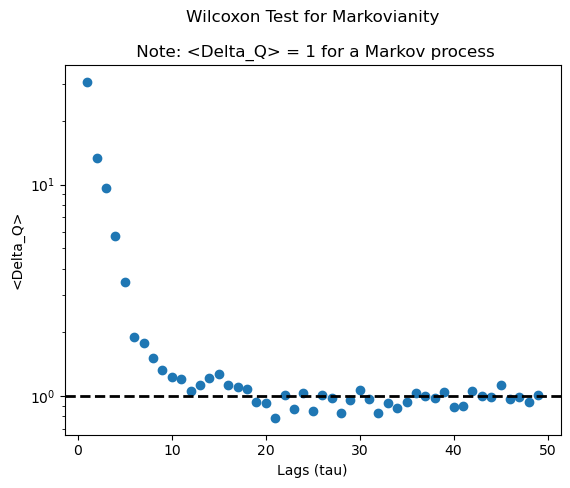

In [26]:
times=np.arange(0,100000,1)
N=len(times);

x=np.empty((N));
x[0]=np.random.uniform(0,1,1)[0];
r=3.96

for i in np.arange(0,N-1):
    x[i+1]=r*x[i] - r*x[i]**2   # Logistic map   -> x(t+1)=rx(t) - rx(t)^2

Markov(x)